In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import ipyvolume as ipv
from ipywidgets import FloatProgress
from IPython.display import display, Image

from tyssue import HistoryHdf5, EventManager

from tyssue.draw import sheet_view, browse_history
from tyssue.geometry.bulk_geometry import ClosedMonolayerGeometry as geom
from tyssue.io import hdf5
from tyssue.dynamics import model_factory, effectors
from tyssue.generation.shapes import spherical_monolayer

from tyssue.behaviors import EventManager
from tyssue.behaviors import increase, decrease, reconnect
from tyssue.solvers.viscous import EulerSolver
from tyssue.utils.decorators import face_lookup


from tyssue.draw import highlight_faces, create_gif, highlight_cells
from tyssue.solvers.quasistatic import QSSolver


from tyssue import HistoryHdf5



from pathlib import Path

from tyssue.utils.decorators import cell_lookup
from tyssue.topology.monolayer_topology import cell_division

from tyssue.dynamics import units
from tyssue.dynamics.sheet_gradients import area_grad

from tyssue.utils import to_nd

In [46]:
Nc = 200
## Lloy_relax=True takes time but shoudl give more spherical epithelium
eptm = spherical_monolayer(9., 12., Nc, apical='in', Lloyd_relax=False)
eptm.settings["lumen_side"] = "apical"

geom.update_all(eptm)
geom.scale(eptm, eptm.cell_df.vol.mean()**(-1/3), list("xyz"))
geom.update_all(eptm)


for df in eptm.datasets.values():
    if np.nan in df:
        print(f"nan values in {df.index.name}")
    df.dropna(axis=1, how='any', inplace=True)

print(f"eptm has {eptm.Nc} cells")

eptm has 219 cells


In [64]:
def get_simple_index(edge_df):
    
    srted = np.sort(edge_df[['srce', 'trgt']].to_numpy(), axis=1)
    shift = np.ceil(np.log10(edge_df.srce.max()))
    multi = int(10**(shift))
    st_hash = srted[:, 0] * multi + srted[:, 1]
    st_hash = pd.Series(st_hash, index=edge_df.index)
    return st_hash.drop_duplicates().index.values


In [66]:
simple = get_simple_index(eptm.edge_df)

In [68]:
def Euler_characteristic(edge_df):
    V = edge_df['srce'].unique().shape[0]
    F = edge_df['face'].unique().shape[0]
    E = get_simple_index(edge_df).shape[0]
    return V - E + F
    

In [79]:
%timeit eptm.edge_df.groupby("cell").apply(Euler_characteristic)

444 ms ± 81.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
from tyssue.core.objects import _is_closed_cell

In [81]:
%timeit eptm.edge_df.groupby("cell").apply(_is_closed_cell)

5.92 s ± 210 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
apical = eptm.get_sub_sheet("apical")

In [118]:
from tyssue import Sheet
from tyssue.dynamics import model_factory, effectors
from tyssue import PlanarGeometry as geom


In [129]:

sheet = Sheet.planar_sheet_2d("euler", 12, 10, 1, 1)

print(Euler_characteristic(sheet.edge_df))

sheet.sanitize(trim_borders=True)
geom.center(sheet)
geom.update_all(sheet)



print(Euler_characteristic(sheet.edge_df))

disk = (sheet.edge_df["fx"]**2 + sheet.edge_df["fy"]**2) < 1

sheet.edge_df = sheet.edge_df[~disk]
sheet.reset_index()
sheet.reset_topo()
sheet.sanitize(trim_borders=True)

print(Euler_characteristic(sheet.edge_df))


33
1
0


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

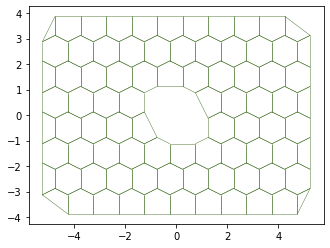

In [130]:
geom.update_all(sheet)
sheet_view(sheet)

In [72]:
Euler_characteristic(apical.edge_df)

2

In [74]:
basal = eptm.get_sub_sheet("basal")

In [75]:
Euler_characteristic(basal.edge_df)

2

In [78]:
%timeit len(set(eptm.edge_df['srce']))
%timeit eptm.edge_df['srce'].unique().shape[0]

901 µs ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
557 µs ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.29 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [67]:
simple.shape

(1736,)

In [48]:
eptm.Nv - simple.shape[0] + eptm.Nf

872

In [54]:
simple.shape

(1736,)

In [49]:
eptm.Nf

1740

In [40]:
st_hash.drop_duplicates()

edge
0       162163
1         5149
2        57196
3         5054
4        57155
         ...  
3311    131339
3471     39247
3581      4212
3583     18226
3617     36244
Length: 832, dtype: object

In [ ]:
def non_oriented(eptm):

    srted = np.sort(eptm.edge_df[['srce', 'trgt']].to_numpy(), axis=1)
    shift = np.ceil(np.log10(eptm.Nv))
    multi = int(10**(shift))
    st_hash = srted[:, 0] * multi + srted[:, 1]
    st_hash = pd.Series(st_hash, index=eptm.edge_df.index)
    
    

In [13]:
np.int()

4

In [20]:
10**size

10000.0

In [29]:
np.unique(cmpl).shape

(872,)

In [30]:
follicle.Ne

3924

In [31]:
size

3.0

In [15]:
cmpl

array([1770178, 200147, 800082, ..., 1290347, 2260347, 80226],
      dtype=object)